In [1]:
import pandas as pd
import numpy as np

# Load 
df = pd.read_csv('raw_data.csv')
df.head()

,id,name,popularity,artists_full,primary_artist_id,explicit,release_date
0,6xV7Be6XEvkSnighmh2Tzj,Sugar On My Tongue,90,"Tyler, The Creator",4V8LLVI7PbaPR0K2TGSxFF,True,2025-07-21
1,3GCdLUSnKSMJhs4Tj6CV3s,"All The Stars (with SZA) - From ""Black Panther...",89,"Kendrick Lamar, SZA",2YZyLoL8N0Wb9xBt1NhZWg,True,2018-02-09
2,7KA4W4McWYRpgf0fWsJZWB,See You Again (feat. Kali Uchis),88,"Tyler, The Creator, Kali Uchis",4V8LLVI7PbaPR0K2TGSxFF,True,2017-07-21
3,1zi7xx7UVEFkmKfv06H8x0,One Dance,88,"Drake, Wizkid, Kyla",3TVXtAsR1Inumwj472S9r4,False,2016-05-06
4,7lQ8MOhq6IN2w8EYcFNSUk,Without Me,87,Eminem,7dGJo4pcD2V6oG8kP0tJRR,True,2002-05-26


In [2]:
# clean data?
print("Data Info")
df.info()
print("\nData Statistics")
print(df.describe())

Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7502 entries, 0 to 7501
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 7502 non-null   object
 1   name               7501 non-null   object
 2   popularity         7502 non-null   int64 
 3   artists_full       7501 non-null   object
 4   primary_artist_id  7502 non-null   object
 5   explicit           7502 non-null   bool  
 6   release_date       7502 non-null   object
dtypes: bool(1), int64(1), object(5)
memory usage: 359.1+ KB

Data Statistics
        popularity
count  7502.000000
mean     42.888163
std      18.132396
min       0.000000
25%      30.000000
50%      44.000000
75%      56.000000
max      90.000000


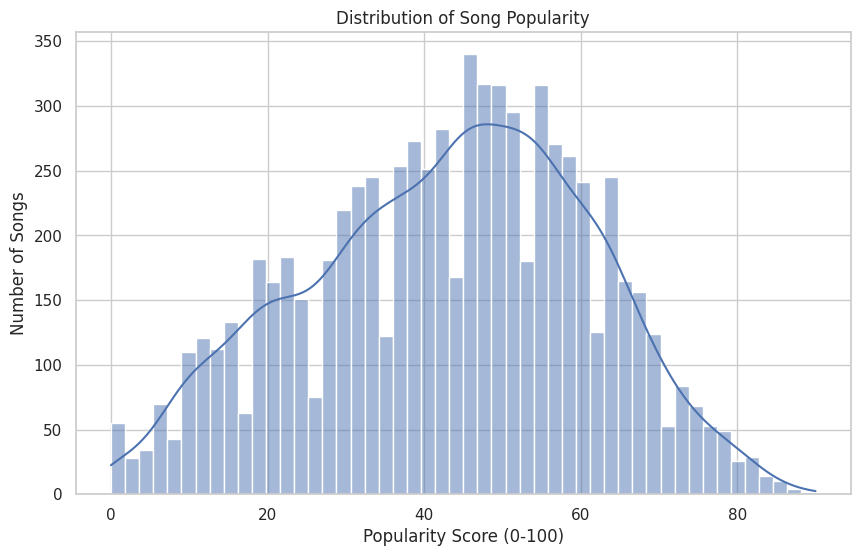

In [3]:
# popularity diagram
import matplotlib.pyplot as plt
import seaborn as sns

#plot it
sns.set_theme(style="whitegrid")

plt.figure(figsize=(10, 6))
sns.histplot(df['popularity'], bins=50, kde=True)
plt.title('Distribution of Song Popularity')
plt.xlabel('Popularity Score (0-100)')
plt.ylabel('Number of Songs')
plt.show()

In [9]:
#nice bell curve -> good data
def calculate_num_artists(artists_full_string): #special function for tyler, the creator due to comma issues
    artists_str = str(artists_full_string)

    sanitized_str = artists_str.replace("Tyler, The Creator", "TylerTheCreator")
    artist_list = sanitized_str.split(',')
    return len(artist_list)

df['num_artists'] = df['artists_full'].apply(calculate_num_artists)

#collab song = >1 artist
df['is_collaboration'] = (df['num_artists'] > 1).astype(int) # converts True/False to 1/0

#length song name
df['track_name_length'] = df['name'].apply(lambda x: len(str(x)))


#convert date to seperate collumns
df['release_date'] = pd.to_datetime(df['release_date'], errors='coerce')
df['release_year'] = df['release_date'].dt.year
df['release_month'] = df['release_date'].dt.month
df['release_day_of_week'] = df['release_date'].dt.dayofweek # (Monday=0, Sunday=6)
#convert explicit to 1/0
df['is_explicit'] = df['explicit'].astype(int)

#see new columns
print("DataFrame with New Features")
df.head(20)

DataFrame with New Features


,id,name,popularity,artists_full,primary_artist_id,explicit,release_date,is_collaboration,num_artists,track_name_length,release_year,release_month,release_day_of_week,is_explicit
0,6xV7Be6XEvkSnighmh2Tzj,Sugar On My Tongue,90,"Tyler, The Creator",4V8LLVI7PbaPR0K2TGSxFF,True,2025-07-21,0,1,18,2025.0,7.0,0.0,1
1,3GCdLUSnKSMJhs4Tj6CV3s,"All The Stars (with SZA) - From ""Black Panther...",89,"Kendrick Lamar, SZA",2YZyLoL8N0Wb9xBt1NhZWg,True,2018-02-09,1,2,58,2018.0,2.0,4.0,1
2,7KA4W4McWYRpgf0fWsJZWB,See You Again (feat. Kali Uchis),88,"Tyler, The Creator, Kali Uchis",4V8LLVI7PbaPR0K2TGSxFF,True,2017-07-21,1,2,32,2017.0,7.0,4.0,1
3,1zi7xx7UVEFkmKfv06H8x0,One Dance,88,"Drake, Wizkid, Kyla",3TVXtAsR1Inumwj472S9r4,False,2016-05-06,1,3,9,2016.0,5.0,4.0,0
4,7lQ8MOhq6IN2w8EYcFNSUk,Without Me,87,Eminem,7dGJo4pcD2V6oG8kP0tJRR,True,2002-05-26,0,1,10,2002.0,5.0,6.0,1
5,6AI3ezQ4o3HUoP6Dhudph3,Not Like Us,87,Kendrick Lamar,2YZyLoL8N0Wb9xBt1NhZWg,True,2024-05-04,0,1,11,2024.0,5.0,5.0,1
6,5TRPicyLGbAF2LGBFbHGvO,Flashing Lights,86,"Kanye West, Dwele",5K4W6rqBFWDnAN6FQUkS6x,True,2007-09-11,1,2,15,2007.0,9.0,1.0,1
7,15JINEqzVMv3SvJTAXAKED,Love The Way You Lie,86,"Eminem, Rihanna",7dGJo4pcD2V6oG8kP0tJRR,True,2010-06-18,1,2,20,2010.0,6.0,4.0,1
8,561jH07mF1jHuk7KlaeF0s,Mockingbird,86,Eminem,7dGJo4pcD2V6oG8kP0tJRR,True,2004-11-12,0,1,11,2004.0,11.0,4.0,1
9,6LxSe8YmdPxy095Ux6znaQ,Headlines,86,Drake,3TVXtAsR1Inumwj472S9r4,True,2011-11-15,0,1,9,2011.0,11.0,1.0,1


In [10]:
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import os
from dotenv import load_dotenv

#from get_data to connect to spotify
# read env file
load_dotenv()
client_id = os.getenv("SPOTIPY_CLIENT_ID")
client_secret = os.getenv("SPOTIPY_CLIENT_SECRET")
if not client_id or not client_secret:
    raise ValueError("Kets not found")
authentication_manager = SpotifyClientCredentials(client_id=client_id, client_secret=client_secret)
sp = spotipy.Spotify(auth_manager=authentication_manager, requests_timeout=30, retries=3)
print("Connected Successfully")

#making our own features: artist popularity and followers, by using the artist id as search for sp
unique_artist_ids = df['primary_artist_id'].dropna().unique()
print(f"Found {len(unique_artist_ids)} unique artists.")

artist_data_map = {}

for i in range(0, len(unique_artist_ids), 50): #50 still because of api restriction
    batch_ids = unique_artist_ids[i:i+50]
    
    print(f"Processing artist batch {i//50 + 1}")
    artists_data = sp.artists(batch_ids)
    for artist in artists_data['artists']:
        if artist:
            artist_data_map[artist['id']] = {
                'artist_popularity': artist['popularity'],
                'artist_followers': artist['followers']['total']}
                
print("Artist fetch complete.")

# map artist popularity and followers
df['artist_popularity'] = df['primary_artist_id'].map(
    lambda x: artist_data_map.get(x, {}).get('artist_popularity') #x is one id, for that id give me the data: popularity, follower, if no then return {}
)

df['artist_followers'] = df['primary_artist_id'].map(
    lambda x: artist_data_map.get(x, {}).get('artist_followers')
)

# fill any artists missed with 0
df['artist_popularity'] = df['artist_popularity'].fillna(0)
df['artist_followers'] = df['artist_followers'].fillna(0)
# date features might have NaN from coerce also 0 
df['release_year'] = df['release_year'].fillna(0)
df['release_month'] = df['release_month'].fillna(0)
df['release_day_of_week'] = df['release_day_of_week'].fillna(0)

print("\nDF with final artist features")
# Show new 
df[['name', 'popularity', 'artist_popularity', 'artist_followers']]

Connected Successfully
Found 498 unique artists.
Processing artist batch 1
Processing artist batch 2
Processing artist batch 3
Processing artist batch 4
Processing artist batch 5
Processing artist batch 6
Processing artist batch 7
Processing artist batch 8
Processing artist batch 9
Processing artist batch 10
Artist fetch complete.

DF with final artist features


,name,popularity,artist_popularity,artist_followers
0,Sugar On My Tongue,90,87,24492412
1,"All The Stars (with SZA) - From ""Black Panther...",89,89,44682383
2,See You Again (feat. Kali Uchis),88,87,24492412
3,One Dance,88,95,103251589
4,Without Me,87,88,104677300
...,...,...,...,...
7497,On Tha Block #3 - Skit,0,86,17967990
7498,The Greatest Rapper (Interlude),0,76,12787604
7499,Outro (Live),0,72,11088183
7500,On The Block #2 - Chopped & Screwed,0,86,17967990


In [11]:
from sklearn.model_selection import train_test_split

#target y is what we want predicted
y = df['popularity']

#X all the numerical columns used to predict
#intentionally leaving out text like name, artists full
feature_columns = [
    'is_collaboration',
    'num_artists',
    'track_name_length',
    'release_year',
    'release_month',
    'release_day_of_week',
    'is_explicit',
    'artist_popularity',
    'artist_followers'
]

X = df[feature_columns]

# use 80% of data to train model, 20% to test it.
# random_state ensures same shuffle every run
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Split Complete")
print(f"Total songs: {len(df)}")
print(f"Training set size: {len(X_train)} songs")
print(f"Testing set size: {len(X_test)} songs")

print("\nFeatures Head")
print(X_train.head())

Split Complete
Total songs: 7502
Training set size: 6001 songs
Testing set size: 1501 songs

Features Head
      is_collaboration  num_artists  track_name_length  release_year  \
3849                 0            1                 12        2010.0   
4590                 1            2                 30        2019.0   
5318                 0            1                 20        2018.0   
2948                 1            2                  9        2023.0   
2513                 1            2                  7        2010.0   

      release_month  release_day_of_week  is_explicit  artist_popularity  \
3849            1.0                  4.0            1                 95   
4590            8.0                  4.0            1                 76   
5318           12.0                  4.0            1                 72   
2948            6.0                  4.0            1                 67   
2513            9.0                  1.0            1                 89   

   

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

#n_estimators=100 means it's 100 "decision trees" working together.
#random_state same result every time.
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
print("Training the model")

model.fit(X_train, y_train)

print("Training Complete")

y_pred = model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\nModel Evaluation")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Training the model
Training Complete

Model Evaluation
Mean Squared Error (MSE): 116.42
R-squared (R²): 0.66


/tmp/ipykernel_59784/3679598480.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


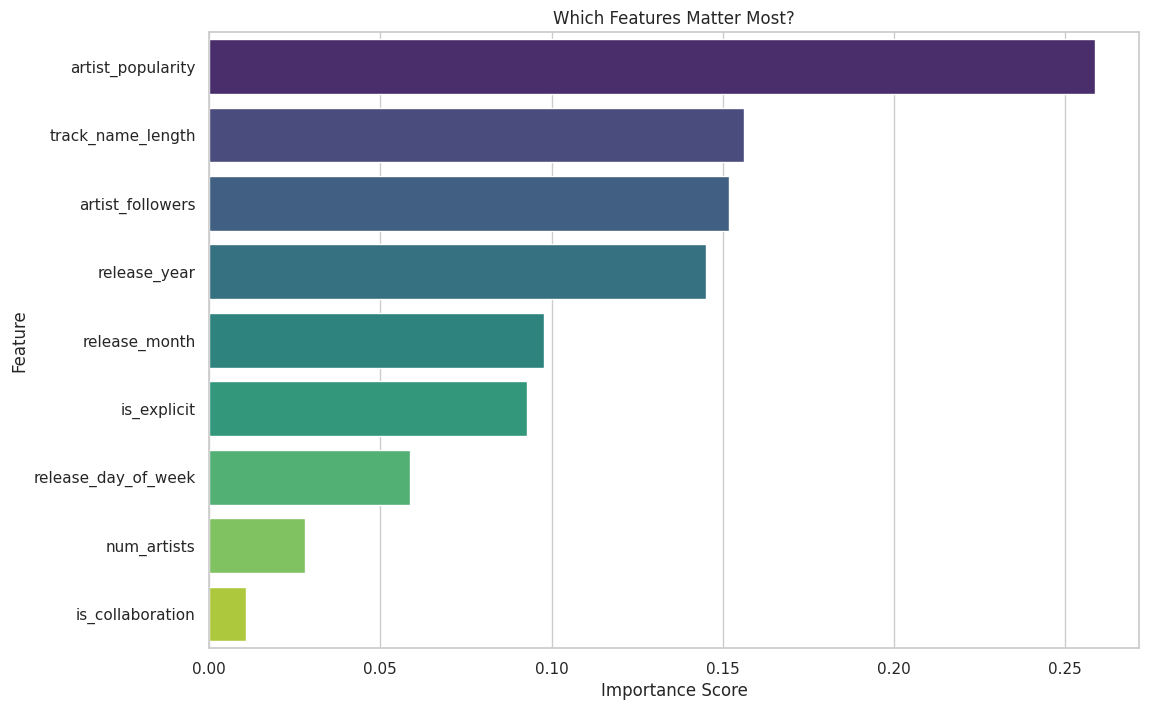

In [13]:
#pretty good r squared result= 0.66 -> plotting weight of features
importances = model.feature_importances_

#match with feature 
feature_importance_df = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importances
})
#sort from high to low
feature_importance_df = feature_importance_df.sort_values(
    by='importance', 
    ascending=False
)

#plot
plt.figure(figsize=(12, 8))
sns.barplot(
    x='importance', 
    y='feature', 
    data=feature_importance_df, 
    palette='viridis'
)
plt.title('Which Features Matter Most?')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.show()

In [14]:
# select target and features
model_columns = [
    'popularity', # target
    'is_collaboration',
    'num_artists',
    'track_name_length',
    'release_year',
    'release_month',
    'release_day_of_week',
    'is_explicit',
    'artist_popularity',
    'artist_followers'
]

final_df = df[model_columns]
final_df = final_df.fillna(0)
final_df.to_csv("model_ready_data.csv", index=False)
print(f"Saved {len(final_df)} rows of model-ready data to '{output_filename}'")

Saved 7502 rows of model-ready data to 'model_ready_data.csv'
